# Attributes database VIC implementation
### Authors: Ana C. Estrada, Rodrigo Careaga & Emilio Ferreira
### Date: 9/30/2019

In [0]:
# Code to hide warnings in outputs
import warnings
warnings.filterwarnings('ignore')

In [0]:
#General libraries needed
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras,os,tarfile,sys,pickle,zipfile

#Sci-kit libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import train_test_split,StratifiedKFold, KFold, ShuffleSplit
from sklearn.utils.multiclass import unique_labels
from sklearn.preprocessing import MinMaxScaler, LabelBinarizer, MultiLabelBinarizer, LabelEncoder, OneHotEncoder
from sklearn.svm import SVR, LinearSVR, LinearSVC, SVC
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#Others
import time
import glob

Using TensorFlow backend.


In [0]:
#mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Supervised Classifiers

### Support Vector Machine

In [0]:
'''
Support Vector Machine function for Classification
10-Fold cross-validation 
Confusion matrix and AUC for each fold are printed
The overall matrix and the average AUC for the 10-folds is printed after evaluating the algorith.
'''

def svmFunct(X,y):
  scores = []
  tpList = []
  fpList = []
  fnList = []
  tnList = []

  best_svc = SVC(gamma='scale', decision_function_shape='ovo')
  cv = KFold(n_splits=10, random_state=1, shuffle=True)

  for train_index, test_index in cv.split(X):
      X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
      best_svc.fit(X_train, y_train)
      y_pred = best_svc.predict(X_test)
      roc_score = roc_auc_score(y_test, y_pred)
      tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()

      print(confusion_matrix(y_test, y_pred))
      print('AUC:',roc_score)

      scores.append(roc_score)
      tpList.append(tp)
      fpList.append(fp)
      fnList.append(fn)
      tnList.append(tn)

  tpTotal = sum(tpList)
  fpTotal = sum(fpList)
  fnTotal = sum(fnList)
  tnTotal = sum(tnList)      
  
  avg_score = ((tpTotal/(tpTotal+fpTotal)) + (tnTotal/(tnTotal+fnTotal)))*0.5

  print('[',tpTotal,' ',fpTotal,']')
  print('[',fnTotal,' ',tnTotal,']')
  print('10-FOLD AVERAGE OF SVM IS:', avg_score)

  return avg_score

### Random forest

In [0]:
'''
Random Forest function for Classification
10-Fold cross-validation 
Confusion matrix and AUC for each fold are printed
The overall matrix and the average AUC for the 10-folds is printed after evaluating the algorith.
'''
def randomForestFunct(X,y):
  scores = []
  tpList = []
  fpList = []
  fnList = []
  tnList = []

  best_rf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=1)
  cv = KFold(n_splits=10, random_state=1, shuffle=True)

  for train_index, test_index in cv.split(X):
      X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
      best_rf.fit(X_train, y_train)
      y_pred = best_rf.predict(X_test)
      roc_score = roc_auc_score(y_test, y_pred)
      tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()

      print(confusion_matrix(y_test, y_pred))
      print('AUC:',roc_score)

      scores.append(roc_score)
      tpList.append(tp)
      fpList.append(fp)
      fnList.append(fn)
      tnList.append(tn)

  tpTotal = sum(tpList)
  fpTotal = sum(fpList)
  fnTotal = sum(fnList)
  tnTotal = sum(tnList)      
  
  avg_score = ((tpTotal/(tpTotal+fpTotal)) + (tnTotal/(tnTotal+fnTotal)))*0.5

  print('[',tpTotal,' ',fpTotal,']')
  print('[',fnTotal,' ',tnTotal,']')
  print('10-FOLD AVERAGE OF RANDOM FOREST IS:', avg_score)

  return avg_score


### Logistic Regression

In [0]:
'''
Logistic Regression function for Classification
10-Fold cross-validation 
Confusion matrix and AUC for each fold are printed
The overall matrix and the average AUC for the 10-folds is printed after evaluating the algorith.
'''


def logregFunct(X,y):
  scores = []
  tpList = []
  fpList = []
  fnList = []
  tnList = []

  best_logreg = LogisticRegression()
  cv = KFold(n_splits=10, random_state=1, shuffle=True)

  for train_index, test_index in cv.split(X):
      X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
      best_logreg.fit(X_train, y_train)
      y_pred = best_logreg.predict(X_test)
      roc_score = roc_auc_score(y_test, y_pred)
      tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()

      print(confusion_matrix(y_test, y_pred))
      print('AUC:',roc_score)

      scores.append(roc_score)
      tpList.append(tp)
      fpList.append(fp)
      fnList.append(fn)
      tnList.append(tn)

  tpTotal = sum(tpList)
  fpTotal = sum(fpList)
  fnTotal = sum(fnList)
  tnTotal = sum(tnList)      
  
  avg_score = ((tpTotal/(tpTotal+fpTotal)) + (tnTotal/(tnTotal+fnTotal)))*0.5

  print('[',tpTotal,' ',fpTotal,']')
  print('[',fnTotal,' ',tnTotal,']')
  print('10-FOLD AVERAGE OF LOGISTIC REGRESSION IS:', avg_score)

  return avg_score

### LDA (Linear Discriminant Analysis)

In [0]:
'''
LDA function for Classification
10-Fold cross-validation 
Confusion matrix and AUC for each fold are printed
The overall matrix and the average AUC for the 10-folds is printed after evaluating the algorith.
'''


def ldaFunct(X,y):
  scores = []
  tpList = []
  fpList = []
  fnList = []
  tnList = []

  best_lda = LinearDiscriminantAnalysis()
  cv = KFold(n_splits=10, random_state=1, shuffle=True)

  for train_index, test_index in cv.split(X):
      X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
      best_lda.fit(X_train, y_train)
      y_pred = best_lda.predict(X_test)
      roc_score = roc_auc_score(y_test, y_pred)
      tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()

      print(confusion_matrix(y_test, y_pred))
      print('AUC:',roc_score)

      scores.append(roc_score)
      tpList.append(tp)
      fpList.append(fp)
      fnList.append(fn)
      tnList.append(tn)
     
  tpTotal = sum(tpList)
  fpTotal = sum(fpList)
  fnTotal = sum(fnList)
  tnTotal = sum(tnList)

  avg_score = ((tpTotal/(tpTotal+fpTotal)) + (tnTotal/(tnTotal+fnTotal)))*0.5

  print('[',tpTotal,' ',fpTotal,']')
  print('[',fnTotal,' ',tnTotal,']')
  print('10-FOLD AVERAGE OF LDA IS:', avg_score)

  return avg_score

### Naive Bayes

In [0]:
'''
Naive Bayes function for Classification
10-Fold cross-validation 
Confusion matrix and AUC for each fold are printed
The overall matrix and the average AUC for the 10-folds is printed after evaluating the algorith.
'''


def naiveBayesFunct(X,y):
  scores = []
  tpList = []
  fpList = []
  fnList = []
  tnList = []

  best_nb = GaussianNB()
  cv = KFold(n_splits=10, random_state=1, shuffle=True)

  for train_index, test_index in cv.split(X):
      X_train, X_test, y_train, y_test = X[train_index], X[test_index], y[train_index], y[test_index]
      best_nb.fit(X_train, y_train)
      y_pred = best_nb.predict(X_test)
      roc_score = roc_auc_score(y_test, y_pred)
      tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()

      print(confusion_matrix(y_test, y_pred))
      print('AUC:',roc_score)

      scores.append(roc_score)
      tpList.append(tp)
      fpList.append(fp)
      fnList.append(fn)
      tnList.append(tn)
  
  tpTotal = sum(tpList)
  fpTotal = sum(fpList)
  fnTotal = sum(fnList)
  tnTotal = sum(tnList)

  avg_score = ((tpTotal/(tpTotal+fpTotal)) + (tnTotal/(tnTotal+fnTotal)))*0.5

  print('[',tpTotal,' ',fpTotal,']')
  print('[',fnTotal,' ',tnTotal,']')
  print('10-FOLD AVERAGE OF NAIVE BAYES IS:', avg_score)

  return avg_score
    

## VIC Implementation

In [0]:
# Initialize the time
start = time.clock() 
# Specify the path of the folder with the files/datasets/clusters
inputPath = '/content/drive/My Drive/datasets/*.csv'
bestAveragesScores = {}
bestMaxScore = {}

for fname in glob.glob(inputPath):
    # Read the file with attributes and class variable
    df = pd.read_csv(fname)
    # Clean the database (in this case class_weka is the class that is written by weka)
    del df['class_weka']
    
    # Assign the attribites to X and the class to y
    X = df.iloc[:, 0:96].values
    y = df.iloc[:, -1:].values

    # Transform categorical variables if needed
    labelencoder = LabelEncoder()
    X[:, 34] = labelencoder.fit_transform(X[:, 34])
    X[:, 37] = labelencoder.fit_transform(X[:, 37])
    X[:, 40] = labelencoder.fit_transform(X[:, 40])
    scaler = MinMaxScaler(feature_range=(0, 1))
    X = scaler.fit_transform(X)
    
    

    # In a dictionary we will save the average AUC of each algorithm for every file/dataset
    avgDict = {}
    avgDict['SVM'] = svmFunct(X,y)
    avgDict['Random Forest'] = randomForestFunct(X,y)
    avgDict['LDA'] = ldaFunct(X,y)
    avgDict['Naive Bayes'] = naiveBayesFunct(X,y)
    avgDict['Logistic Regression'] = logregFunct(X,y)

    # Implement the five classifiers and save the max AUC from all of them
    maxScores = max(avgDict.items(), key = lambda x: x[1])
    avgDict['MAX Score'] = maxScores
    
    # The best AUC gotten by the five algorithms in the current cluster
    print('BEST AUC FROM 5-ALGORITHMS:',avgDict['MAX Score'])

    # Save the best AUC from all the algorithms in every file/dataset
    bestAveragesScores[fname] = avgDict
    bestMaxScore[fname] = maxScores
    


end = time.clock()
totalTime = end-start

print("Total Time: {} ".format(totalTime)) 

[[16  0]
 [ 4  1]]
AUC: 0.6
[[14  0]
 [ 4  2]]
AUC: 0.6666666666666666
[[11  2]
 [ 6  1]]
AUC: 0.49450549450549447
[[16  0]
 [ 2  2]]
AUC: 0.75
[[11  1]
 [ 7  1]]
AUC: 0.5208333333333334
[[14  0]
 [ 5  1]]
AUC: 0.5833333333333334
[[12  3]
 [ 1  4]]
AUC: 0.8
[[15  0]
 [ 4  1]]
AUC: 0.6
[[15  2]
 [ 2  1]]
AUC: 0.6078431372549019
[[12  4]
 [ 3  1]]
AUC: 0.5
[ 136   12 ]
[ 38   15 ]
10-FOLD AVERAGE OF SVM IS: 0.6009688934217237
[[16  0]
 [ 4  1]]
AUC: 0.6
[[13  1]
 [ 2  4]]
AUC: 0.7976190476190476
[[12  1]
 [ 5  2]]
AUC: 0.6043956043956044
[[16  0]
 [ 3  1]]
AUC: 0.625
[[10  2]
 [ 5  3]]
AUC: 0.6041666666666667
[[14  0]
 [ 2  4]]
AUC: 0.8333333333333333
[[12  3]
 [ 1  4]]
AUC: 0.8
[[14  1]
 [ 1  4]]
AUC: 0.8666666666666667
[[15  2]
 [ 1  2]]
AUC: 0.7745098039215685
[[10  6]
 [ 3  1]]
AUC: 0.4375
[ 132   16 ]
[ 27   26 ]
10-FOLD AVERAGE OF RANDOM FOREST IS: 0.6912289648138705
[[13  3]
 [ 3  2]]
AUC: 0.60625
[[12  2]
 [ 3  3]]
AUC: 0.6785714285714286
[[11  2]
 [ 3  4]]
AUC: 0.708791208791208

## VIC result 


In [0]:
# Function to print the final result
def printVICresult(avgDict,bestMaxScore):
  print('---------------------------------------')
  # At the end of evaluating all the files/datasets the result of VIC is printed
  print('BEST DATABASE MAX:',max(bestMaxScore.items(), key = lambda x: x[1][1]))
  print('---------------------------------------')
  return


In [0]:
printVICresult(avgDict,bestMaxScore)

---------------------------------------
BEST DATABASE MAX: ('/content/drive/My Drive/datasets/dataset_99.csv', ('Random Forest', 0.8799762329174093))
---------------------------------------


In [0]:
# Complete results by cluster specifying the classifying algorithm and AUC result
bestAveragesScores

{'/content/drive/My Drive/datasets/dataset_100.csv': {'LDA': 0.760940594059406,
  'Logistic Regression': 0.8603960396039605,
  'MAX Score': ('Random Forest', 0.8704455445544554),
  'Naive Bayes': 0.8303465346534653,
  'Random Forest': 0.8704455445544554,
  'SVM': 0.8501485148514851},
 '/content/drive/My Drive/datasets/dataset_101.csv': {'LDA': 0.7714851485148515,
  'Logistic Regression': 0.855990099009901,
  'MAX Score': ('Random Forest', 0.8658910891089109),
  'Naive Bayes': 0.8263861386138613,
  'Random Forest': 0.8658910891089109,
  'SVM': 0.8463366336633663},
 '/content/drive/My Drive/datasets/dataset_102.csv': {'LDA': 0.7918894830659537,
  'Logistic Regression': 0.85650623885918,
  'MAX Score': ('Random Forest', 0.8612596553773024),
  'Naive Bayes': 0.8324420677361855,
  'Random Forest': 0.8612596553773024,
  'SVM': 0.8523469994058229},
 '/content/drive/My Drive/datasets/dataset_103.csv': {'LDA': 0.79750346740638,
  'Logistic Regression': 0.8470378442639191,
  'MAX Score': ('Rando

In [0]:
# Best AUC by cluster
bestMaxScore

{'/content/drive/My Drive/datasets/dataset_100.csv': 0.8704455445544554,
 '/content/drive/My Drive/datasets/dataset_101.csv': 0.8658910891089109,
 '/content/drive/My Drive/datasets/dataset_102.csv': 0.8612596553773024,
 '/content/drive/My Drive/datasets/dataset_103.csv': 0.8516445413116702,
 '/content/drive/My Drive/datasets/dataset_104.csv': 0.8499206978588422,
 '/content/drive/My Drive/datasets/dataset_105.csv': 0.8474702380952381,
 '/content/drive/My Drive/datasets/dataset_106.csv': 0.8421549155908639,
 '/content/drive/My Drive/datasets/dataset_107.csv': 0.8312785842115729,
 '/content/drive/My Drive/datasets/dataset_108.csv': 0.8388590203106332,
 '/content/drive/My Drive/datasets/dataset_109.csv': 0.8284303948942959,
 '/content/drive/My Drive/datasets/dataset_110.csv': 0.8185314685314685,
 '/content/drive/My Drive/datasets/dataset_111.csv': 0.8231231231231231,
 '/content/drive/My Drive/datasets/dataset_112.csv': 0.817516051364366,
 '/content/drive/My Drive/datasets/dataset_113.csv':

# Saving results into a csv file and ploting into an eps file

In [0]:
# Writing the file with all the results
import csv
with open('dictFinal.csv', 'w') as f:
    for key in bestAveragesScores.keys():
        f.write("%s,%s\n"%(key,bestAveragesScores[key]))

In [0]:
df_plot = pd.read_csv('/content/drive/My Drive/dictFinal.csv')

## Ploting the AUC obtained by VIC algorithm

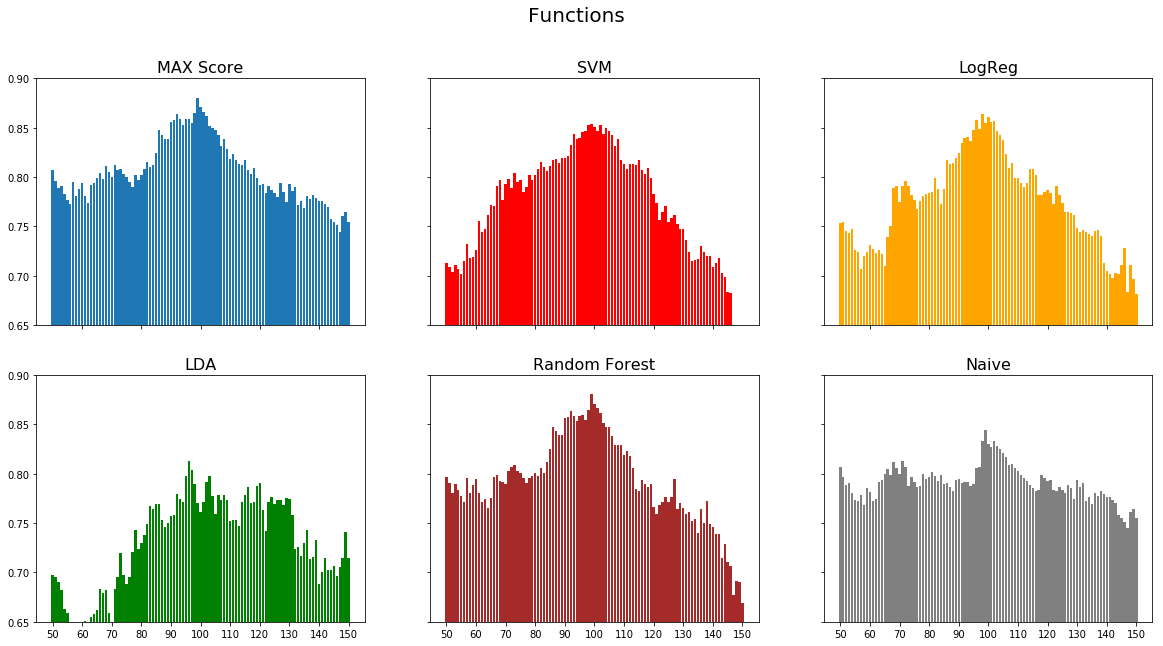

In [0]:
fig, ((ax1, ax2,ax3), (ax4, ax5,ax6)) = plt.subplots(2, 3, figsize=(20,10))
fig.suptitle('Functions', fontsize=20)
ax1.bar(df_plot['dataset_file'], df_plot['MAX Score'])
ax1.set_title('MAX Score', fontsize=16)
ax1.set_ylim([0.65,0.9])
ax2.bar(df_plot['dataset_file'], df_plot['SVM'], color='red')
ax2.set_title('SVM', fontsize=16)
ax2.set_ylim([0.65,0.9])
ax3.bar(df_plot['dataset_file'], df_plot['Logistic Regression'], color='orange')
ax3.set_title('LogReg', fontsize=16)
ax3.set_ylim([0.65,0.9])
ax4.bar(df_plot['dataset_file'], df_plot['LDA'], color='green')
ax4.set_title('LDA', fontsize=16)
ax4.set_ylim([0.65,0.9])
ax4.set_xticks(np.arange(50, 160, 10))
ax5.bar(df_plot['dataset_file'], df_plot['Random Forest'], color='brown')
ax5.set_title('Random Forest', fontsize=16)
ax5.set_xticks(np.arange(50, 160, 10))
ax5.set_ylim([0.65,0.9])
ax6.bar(df_plot['dataset_file'], df_plot['Naive Bayes'], color='gray')
ax6.set_title('Naive', fontsize=16)
ax6.set_xticks(np.arange(50, 160, 10))
ax6.set_ylim([0.65,0.9])

for ax in fig.get_axes():
    ax.label_outer()

fig.savefig('test.eps')